Imagine the following: you're walking up the empire state building and you're playing a game with a friend. 
You throw a die one hundred times.

 - If it's 1 or 2 you'll go one step down.

 - If it's 3, 4, or 5, you'll go one step up.

 - If you throw a 6, you'll throw the die again and will walk up the resulting number of steps.


Of course, you can not go lower than step number 0. And also, you admit that you're a bit clumsy and have a chance of 0.1% of falling down the stairs when you make a move. Falling down means that you have to start again from step 0. With all of this in mind, you bet with your friend that you'll reach 60 steps high.

What is the chance that you will win this bet? 
One way to solve it would be to calculate the chance analytically using equations. Another possible approach, is to simulate this process thousands of times, and see in what fraction of the simulations that you will reach 60 steps. This is a form of -hacker statistics-. As you can probably guess, we're going to opt for the second approach.

In [4]:
# Import numpy and set seed
import numpy as np
np.random.seed(123)


# Starting step
step = 50

# Roll the dice
dice = np.random.randint(1,7)

# Finish the control construct
if dice <= 2 : 
    step = step - 1 #If dice is 1 or 2, you go one step down
elif dice <= 5  :
    step = step + 1 #if dice is 3, 4 or 5, you go one step up
else :
    step = step + np.random.randint(1,7) #you throw the dice again

# Print out dice and step
print(dice)
print(step)

6
53


If you use a dice to determine your next step, you can call this a random step. What if you use a dice 100 times to determine your next step? You would have a succession of random steps, or in other words, a random walk.

Now it's time to put this code inside a for loop so that we can simulate a random walk.

In [6]:
# Initialize random_walk
random_walk = [0]

# Complete the random walk
for x in range(100) :
    # Set step: last element in random_walk
    step = random_walk[-1]

    # Roll the dice
    dice = np.random.randint(1,7)

    # Determine next step
    if dice <= 2:
        step = max(0, step - 1) #use max to make sure step can't go below 0
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)

    # append next_step to random_walk
    random_walk.append(step)

# Print random_walk
print(random_walk)

[0, 0, 0, 2, 1, 2, 4, 5, 6, 11, 10, 11, 12, 13, 14, 15, 14, 19, 20, 21, 22, 21, 20, 19, 18, 17, 18, 19, 20, 26, 25, 24, 23, 24, 25, 26, 25, 26, 27, 26, 31, 32, 31, 30, 29, 28, 29, 28, 27, 29, 30, 33, 34, 36, 37, 38, 39, 38, 37, 38, 39, 40, 41, 40, 41, 42, 43, 46, 47, 48, 47, 48, 47, 48, 49, 50, 54, 53, 52, 53, 54, 55, 54, 55, 54, 55, 57, 62, 61, 62, 63, 64, 65, 66, 67, 66, 67, 68, 69, 71, 73]


Let's visualize this random walk

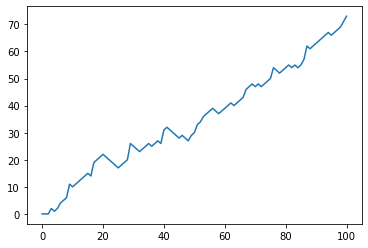

In [7]:
import matplotlib.pyplot as plt

# Plot random_walk
plt.plot(random_walk)

# Show the plot
plt.show()

But you still have to answer the main question: what is the chance that you'll reach 60 steps high? 
Each random walk will end up on a different step. If you simulate this walk thousands of times, you will end up with thousands of final steps. This is actually a distribution of final steps. And once you know the distribution, you can start calculating chances.

To get an idea about how big your chances are of reaching 60 steps, you can repeatedly simulate the random walk and collect the results. 

In [8]:
# Initialize all_walks
all_walks = []

# Simulate random walk five times
for i in range(5) :

    # Code from before
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)

        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        random_walk.append(step)

    # Append random_walk to all_walks
    all_walks.append(random_walk)

# Print all_walks
print(all_walks)

[[0, 0, 1, 2, 5, 4, 5, 4, 5, 6, 7, 6, 7, 6, 7, 8, 10, 9, 8, 9, 10, 9, 11, 12, 13, 14, 15, 16, 17, 16, 17, 18, 23, 24, 23, 22, 21, 20, 21, 22, 23, 28, 29, 28, 29, 30, 31, 32, 33, 34, 33, 32, 33, 32, 38, 37, 38, 37, 38, 37, 38, 42, 46, 48, 50, 49, 50, 52, 51, 57, 58, 60, 61, 60, 61, 62, 63, 62, 63, 64, 65, 67, 66, 65, 66, 72, 77, 76, 75, 79, 80, 81, 82, 84, 83, 84, 83, 84, 83, 82, 88], [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 7, 8, 7, 6, 7, 6, 7, 6, 7, 8, 12, 13, 12, 18, 17, 16, 17, 16, 15, 16, 15, 19, 18, 19, 18, 19, 18, 19, 21, 20, 19, 18, 19, 18, 23, 24, 25, 24, 23, 24, 23, 24, 23, 28, 29, 28, 27, 26, 25, 26, 27, 31, 37, 38, 39, 40, 41, 40, 41, 43, 44, 45, 46, 45, 44, 45, 44, 45, 46, 47, 46, 47, 48, 49, 48, 47, 48, 49, 54, 55, 56, 61, 60, 61, 60, 61, 62, 63, 64, 63, 69], [0, 0, 1, 0, 0, 1, 5, 6, 7, 8, 9, 8, 7, 6, 5, 4, 5, 6, 7, 8, 9, 10, 9, 10, 11, 10, 11, 12, 15, 14, 15, 14, 15, 18, 19, 20, 21, 20, 19, 22, 23, 24, 25, 24, 23, 24, 27, 28, 33, 34, 33, 34, 33, 34, 33, 39, 38, 37, 38, 40, 39, 38, 

Now let's visualize the 5 random walks!

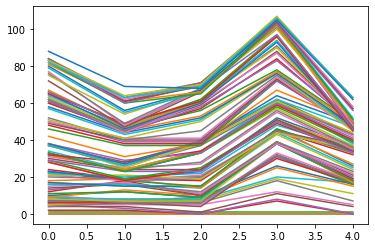

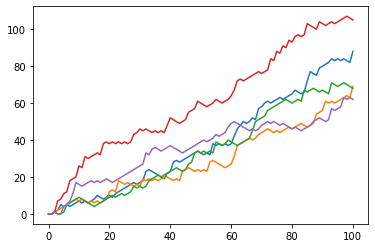

In [9]:
# Convert all_walks to NumPy array: np_aw
np_aw = np.array(all_walks)

# Plot np_aw and show
plt.plot(np_aw)
plt.show()

# Clear the figure
plt.clf()

# Transpose np_aw: np_aw_t
np_aw_t = np.transpose(np_aw) #Now every row in np_all_walks represents the position after 1 throw for the five random walks

# Plot np_aw_t and show
plt.plot(np_aw_t)
plt.show()

In the second plot we can clearly see how the different simulations of the random walk went.

There's still something we forgot! You're a bit clumsy and you have a 0.5% chance of falling down. Let's add that into the code.

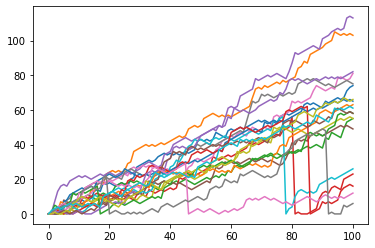

In [10]:
# Simulate random walk 20 times
all_walks = []
for i in range(20) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)

        # Implement clumsiness
        if np.random.rand() <= 0.005 :
            step = 0

        random_walk.append(step)
    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))
plt.plot(np_aw_t)
plt.show()

Now in some of the 20 simulations you're indeed taking a deep dive down!

Returning to the initial question, you want to know about the end points of all the random walks you've simulated. These end points have a certain distribution that you can visualize with a histogram.

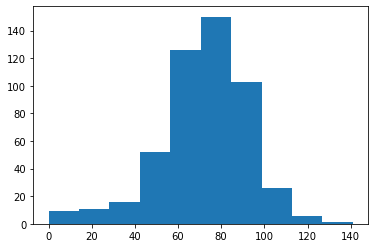

In [12]:
# Simulate random walk 500 times
all_walks = []
for i in range(500) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        if np.random.rand() <= 0.001 :
            step = 0
        random_walk.append(step)
    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))

# Select last row from np_aw_t: ends
ends = np_aw_t[-1,:]

# Plot histogram of ends, display plot
plt.hist(ends)
plt.show()

The histogram was created from a NumPy array ends, that contains 500 integers. Each integer represents the end point of a random walk. To calculate the chance that this end point is greater than or equal to 60, you can count the number of integers in ends that are greater than or equal to 60 and divide that number by 500, the total number of simulations.

In [14]:
ends[ends >= 60].size/500

0.786

Seems like you have a pretty high chance of winning the bet!